In [98]:
import re
import seaborn as sns
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import datetime
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [99]:
def startsWithDateAndTimeAndroid(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [100]:
def startsWithDateAndTimeios(s):
    pattern = '^([[0-9]+)(/)([0-9]+)(/)([0-9]+)(, )([0-9]+):([0-9]+):([(0-9]+][ ]?)'
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [101]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [102]:
def getDataPointAndroid(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(':') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [103]:
def getDataPointios(line):
    splitLine = line.split('] ')
    dateTime = splitLine[0]
    if ',' in dateTime:
        date, time = dateTime.split(',')
    else:
        date, time = dateTime.split(' ')
    message = ' '.join(splitLine[1:])
    if FindAuthor(message):
        splitMessage = message.split(':')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    if time[5]==":":
        time = time[:5]+time[-3:]
    else:
        if 'AM' in time or 'PM' in time:
            time = time[:6]+time[-3:]
        else:
            time = time[:6]
    return date, time, author, message

In [104]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)

    return emoji_list

In [105]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = 'C://Users/Biggest/Downloads/_chat.txt' 
with open(conversationPath, encoding="utf-8") as fp:
    device=''
    first=fp.readline()
    print(first)
    if '[' in first:
      device='ios'
    else:
      device="android"
    fp.readline() 
    messageBuffer = [] 
    date, time, author = None, None, None #message contains 4 things-"date","time","author","message" 
    while True:
        line = fp.readline() 
        if not line: 
            break
        if device=="ios":
          line = line.strip()
          if startsWithDateAndTimeios(line):
            if len(messageBuffer) > 0:
              parsedData.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPointios(line)
            messageBuffer.append(message)
          else:
            line= (line.encode('ascii', 'ignore')).decode("utf-8")
            if startsWithDateAndTimeios(line):
              if len(messageBuffer) > 0:
                parsedData.append([date, time, author, ' '.join(messageBuffer)])
              messageBuffer.clear()
              date, time, author, message = getDataPointios(line)
              messageBuffer.append(message)
            else:
              messageBuffer.append(line)
        else:
          line = line.strip()
          if startsWithDateAndTimeAndroid(line): 
            if len(messageBuffer) > 0:
              parsedData.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPointAndroid(line)
            messageBuffer.append(message)
          else:
            messageBuffer.append(line)

[14/12/2023, 10:05:12] Ijesha Digital Hub Training Cohort 1: ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.



In [106]:
if device =='android':
        df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
        df["Date"] = pd.to_datetime(df["Date"])
        df = df.dropna()
        df["emoji"] = df["Message"].apply(split_count)
        URLPATTERN = r'(https?://\S+)'
        df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
else:
        df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
        df = df.dropna()
        df["emoji"] = df["Message"].apply(split_count)
        URLPATTERN = r'(https?://\S+)'
        df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [107]:
df.head(10) #return first ten rows of dataframe


,Date,Time,Author,Message,emoji,urlcount
0,[14/12/2023,10:05,Ijesha Digital Hub Training Cohort 1,‎~ Farmwella Nigeria Limited added you,[],0
1,[14/12/2023,10:05,~ Farmwella Nigeria Limited,‎~ Farmwella Nigeria Limited changed this gro...,[],0
2,[14/12/2023,10:05,~ Tsmart Solutions.,‎~ Farmwella Nigeria Limited added ~ Tsmart S...,[],0
3,[14/12/2023,10:05,~ Alex Omoniyi (FCA),‎~ Farmwella Nigeria Limited added ~ Alex Omo...,[],0
4,[14/12/2023,10:05,"~ O. D. AJAYI (CCSP, ACICRM, MICA)",‎~ Farmwella Nigeria Limited added ~ O. D. AJ...,[],0
5,[14/12/2023,10:05,~ Ibukunoluwa💕💕,‎~ Farmwella Nigeria Limited added ~ Ibukunol...,"[💕, 💕]",0
6,[14/12/2023,10:06,~ Oyebode Dayo Johnson,‎~ Farmwella Nigeria Limited added ~ Oyebode ...,[],0
7,[14/12/2023,10:06,~ SIR TEE 🖥️🖱️🖨️,‎~ Farmwella Nigeria Limited added ~ SIR TEE ...,"[🖥️, 🖱️, 🖨️]",0
8,[14/12/2023,10:06,Mipe,‎~ Farmwella Nigeria Limited added Mipe,[],0
9,[14/12/2023,10:09,~ Noon Ray Mega Interbiz,‎~ Farmwella Nigeria Limited added ~ Noon Ray...,[],0


In [108]:
df.info() #statistics of the group chat


<class 'pandas.core.frame.DataFrame'>
Index: 1060 entries, 0 to 1094
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1060 non-null   object
 1   Time      1060 non-null   object
 2   Author    1060 non-null   object
 3   Message   1060 non-null   object
 4   emoji     1060 non-null   object
 5   urlcount  1060 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 58.0+ KB


In [109]:
df.Author.unique() #returns all unique athors means all members of group


array(['Ijesha Digital Hub Training Cohort 1',
       '~\u202fFarmwella Nigeria Limited', '~\u202fTsmart Solutions.',
       '~\u202fAlex Omoniyi (FCA)',
       '~\u202fO. D. AJAYI (CCSP, ACICRM, MICA)', '~\u202fIbukunoluwa💕💕',
       '~\u202fOyebode Dayo Johnson', '~\u202fSIR TEE 🖥️🖱️🖨️', 'Mipe',
       '~\u202fNoon Ray Mega Interbiz', '~\u202fAkin',
       '~\u202fAdedeji Joseph kayode', '~\u202fPrince Abiodunsebioye',
       '~\u202fVicardTim', '~\u202fdavidolalekanoladele',
       '~\u202fAdeyemi ABIONA', '~\u202fKaffy',
       '~\u202fGreatly Blessed Blessing', '~\u202fDeproowglobal',
       '~\u202f@i_am_Atáyérọ™️ #FOUNDRY', '~\u202fBF Wears',
       '~\u202fGilded Glow by Keji', '~\u202ftife69', '~\u202fOlaitan',
       '~\u202fOdubadians', '~\u202fTaofeeq Popoola',
       '~\u202fFulfillment Concept 🥰', '~\u202fMoriireoluwa',
       '~\u202fCrownpet', '~\u202fOluwaseyitan',
       '~\u202fFatiregun MUSKY Olumuyiwa',
       '~\u202fGraphic Artist, UI/UX Designer & Arts educator.

In [110]:
df = df.dropna() #drops all null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1060 entries, 0 to 1094
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1060 non-null   object
 1   Time      1060 non-null   object
 2   Author    1060 non-null   object
 3   Message   1060 non-null   object
 4   emoji     1060 non-null   object
 5   urlcount  1060 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 58.0+ KB


In [111]:
total_messages = df.shape[0]
print(total_messages)

1060


In [112]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)

0


In [113]:
emojis = sum(df['emoji'].str.len()) 
print(emojis)

98


In [114]:
URLPATTERN = r'(https?://\S+)' #regex pattern matching with start with https
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len() #return url which matches with pattern and count it through lambda function
links = np.sum(df.urlcount) #sumup all the links
print(links)

31


## Let us separate media messages and text messages

In [115]:
link_messages= df[df['urlcount']>0]
deleted_messages=df[(df["Message"] == " You deleted this message")| (df["Message"] == " This message was deleted.")]
media_messages_df = df[(df['Message'] == ' <Media omitted>')|(df['Message'] == ' image omitted')|(df['Message'] == ' video omitted')|(df['Message'] == ' sticker omitted')]
messages_df = df.drop(media_messages_df.index)
messages_df = messages_df.drop(deleted_messages.index)
messages_df = messages_df.drop(link_messages.index)

In [116]:
messages_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 973 entries, 0 to 1094
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      973 non-null    object
 1   Time      973 non-null    object
 2   Author    973 non-null    object
 3   Message   973 non-null    object
 4   emoji     973 non-null    object
 5   urlcount  973 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 53.2+ KB


## Now let's calculate words and letters 

In [117]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' '))) #word is calculated by spliting sentence by whitespace
messages_df["MessageCount"]=1

In [118]:
messages_df.head(10)


,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount
0,[14/12/2023,10:05,Ijesha Digital Hub Training Cohort 1,‎~ Farmwella Nigeria Limited added you,[],0,39,6,1
1,[14/12/2023,10:05,~ Farmwella Nigeria Limited,‎~ Farmwella Nigeria Limited changed this gro...,[],0,55,8,1
2,[14/12/2023,10:05,~ Tsmart Solutions.,‎~ Farmwella Nigeria Limited added ~ Tsmart S...,[],0,55,7,1
3,[14/12/2023,10:05,~ Alex Omoniyi (FCA),‎~ Farmwella Nigeria Limited added ~ Alex Omo...,[],0,56,8,1
4,[14/12/2023,10:05,"~ O. D. AJAYI (CCSP, ACICRM, MICA)",‎~ Farmwella Nigeria Limited added ~ O. D. AJ...,[],0,70,11,1
5,[14/12/2023,10:05,~ Ibukunoluwa💕💕,‎~ Farmwella Nigeria Limited added ~ Ibukunol...,"[💕, 💕]",0,51,6,1
6,[14/12/2023,10:06,~ Oyebode Dayo Johnson,‎~ Farmwella Nigeria Limited added ~ Oyebode ...,[],0,58,8,1
7,[14/12/2023,10:06,~ SIR TEE 🖥️🖱️🖨️,‎~ Farmwella Nigeria Limited added ~ SIR TEE ...,"[🖥️, 🖱️, 🖨️]",0,52,8,1
8,[14/12/2023,10:06,Mipe,‎~ Farmwella Nigeria Limited added Mipe,[],0,40,6,1
9,[14/12/2023,10:09,~ Noon Ray Mega Interbiz,‎~ Farmwella Nigeria Limited added ~ Noon Ray...,[],0,60,9,1


In [119]:
messages_df["emojicount"]= df['emoji'].str.len()


## Author wise

In [120]:
frnds = messages_df.Author.unique()

for i in range(len(frnds)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == frnds[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {frnds[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == frnds[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(link_messages[link_messages['Author'] == frnds[i]]["urlcount"])   
  print('Links Sent', links)   
  print()

Stats of Ijesha Digital Hub Training Cohort 1 -
Messages Sent 3
Words per message 8.0
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

Stats of ~ Farmwella Nigeria Limited -
Messages Sent 36
Words per message 25.416666666666668
Media Messages Sent 0
Emojis Sent 0
Links Sent 4

Stats of ~ Tsmart Solutions. -
Messages Sent 3
Words per message 19.666666666666668
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

Stats of ~ Alex Omoniyi (FCA) -
Messages Sent 4
Words per message 14.75
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

Stats of ~ O. D. AJAYI (CCSP, ACICRM, MICA) -
Messages Sent 11
Words per message 16.09090909090909
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

Stats of ~ Ibukunoluwa💕💕 -
Messages Sent 8
Words per message 13.375
Media Messages Sent 0
Emojis Sent 3
Links Sent 0

Stats of ~ Oyebode Dayo Johnson -
Messages Sent 17
Words per message 18.529411764705884
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

Stats of ~ SIR TEE 🖥️🖱️🖨️ -
Messages Sent 18
Words per messa

# unique emojis

In [121]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

40


# Most used emoji

In [122]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
print(emoji_dict)

[('🙏', 16), ('🫡', 8), ('✅', 5), ('👆', 5), ('🙇\u200d♂️', 4), ('😂', 4), ('😊', 3), ('✍️', 3), ('👏', 3), ('😨', 3), ('🤦\u200d♂️', 3), ('👇', 3), ('💕', 2), ('🥰', 2), ('🙌', 2), ('👍🏽', 2), ('🤣', 2), ('🎊', 2), ('🖥️', 1), ('🖱️', 1), ('🖨️', 1), ('™️', 1), ('🖥', 1), ('❤️', 1), ('🚔', 1), ('😀', 1), ('🙏🏽', 1), ('👍🏼', 1), ('🤩', 1), ('🥺', 1), ('💯', 1), ('🤖', 1), ('🛡️', 1), ('🤷🏽\u200d♂️', 1), ('😄', 1), ('🫣', 1), ('😁', 1), ('👌', 1), ('🥵', 1), ('👍', 1)]


In [123]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,🙏,16
1,🫡,8
2,✅,5
3,👆,5
4,🙇‍♂️,4
5,😂,4
6,😊,3
7,✍️,3
8,👏,3
9,😨,3


In [124]:
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Text(0, 0.5, 'Time')

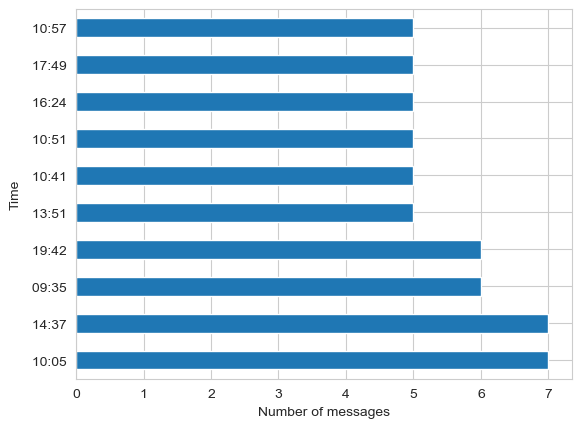

In [125]:
messages_df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Time')

In [126]:
#Converting a timestamp colunm into string so we can extract 'Year', 'Month', and 'Day'

df1=df['Date'].astype(str)

#extract Year, Month, Date

df['day'] = df1.apply(lambda x: x.split("/")[0])
df['month'] = df1.apply(lambda x: x.split("/")[1])
df['year'] = df1.apply(lambda x: x.split("/")[2])




#print our new data
df

,Date,Time,Author,Message,emoji,urlcount,day,month,year
0,[14/12/2023,10:05,Ijesha Digital Hub Training Cohort 1,‎~ Farmwella Nigeria Limited added you,[],0,[14,12,2023
1,[14/12/2023,10:05,~ Farmwella Nigeria Limited,‎~ Farmwella Nigeria Limited changed this gro...,[],0,[14,12,2023
2,[14/12/2023,10:05,~ Tsmart Solutions.,‎~ Farmwella Nigeria Limited added ~ Tsmart S...,[],0,[14,12,2023
3,[14/12/2023,10:05,~ Alex Omoniyi (FCA),‎~ Farmwella Nigeria Limited added ~ Alex Omo...,[],0,[14,12,2023
4,[14/12/2023,10:05,"~ O. D. AJAYI (CCSP, ACICRM, MICA)",‎~ Farmwella Nigeria Limited added ~ O. D. AJ...,[],0,[14,12,2023
...,...,...,...,...,...,...,...,...,...
1089,[09/02/2024,10:31,~ Olayinka,Welcome to Swifyfly Courier/Delivery Service ...,[],1,[09,02,2024
1090,[09/02/2024,12:09,~ Farmwella Nigeria Limited,"Hello everyone, It's important to have your ...",[],0,[09,02,2024
1091,[11/02/2024,18:51,~ KAY,‎This message was deleted.,[],0,[11,02,2024
1093,[11/02/2024,23:15,~ Olayinka,Done,[],0,[11,02,2024


In [127]:
#cleaning the day colunm

df['day']=df['day'].str.replace('[','')
df

,Date,Time,Author,Message,emoji,urlcount,day,month,year
0,[14/12/2023,10:05,Ijesha Digital Hub Training Cohort 1,‎~ Farmwella Nigeria Limited added you,[],0,14,12,2023
1,[14/12/2023,10:05,~ Farmwella Nigeria Limited,‎~ Farmwella Nigeria Limited changed this gro...,[],0,14,12,2023
2,[14/12/2023,10:05,~ Tsmart Solutions.,‎~ Farmwella Nigeria Limited added ~ Tsmart S...,[],0,14,12,2023
3,[14/12/2023,10:05,~ Alex Omoniyi (FCA),‎~ Farmwella Nigeria Limited added ~ Alex Omo...,[],0,14,12,2023
4,[14/12/2023,10:05,"~ O. D. AJAYI (CCSP, ACICRM, MICA)",‎~ Farmwella Nigeria Limited added ~ O. D. AJ...,[],0,14,12,2023
...,...,...,...,...,...,...,...,...,...
1089,[09/02/2024,10:31,~ Olayinka,Welcome to Swifyfly Courier/Delivery Service ...,[],1,09,02,2024
1090,[09/02/2024,12:09,~ Farmwella Nigeria Limited,"Hello everyone, It's important to have your ...",[],0,09,02,2024
1091,[11/02/2024,18:51,~ KAY,‎This message was deleted.,[],0,11,02,2024
1093,[11/02/2024,23:15,~ Olayinka,Done,[],0,11,02,2024


In [128]:
df = df.drop(['Date'], axis = 1)

In [129]:
df

,Time,Author,Message,emoji,urlcount,day,month,year
0,10:05,Ijesha Digital Hub Training Cohort 1,‎~ Farmwella Nigeria Limited added you,[],0,14,12,2023
1,10:05,~ Farmwella Nigeria Limited,‎~ Farmwella Nigeria Limited changed this gro...,[],0,14,12,2023
2,10:05,~ Tsmart Solutions.,‎~ Farmwella Nigeria Limited added ~ Tsmart S...,[],0,14,12,2023
3,10:05,~ Alex Omoniyi (FCA),‎~ Farmwella Nigeria Limited added ~ Alex Omo...,[],0,14,12,2023
4,10:05,"~ O. D. AJAYI (CCSP, ACICRM, MICA)",‎~ Farmwella Nigeria Limited added ~ O. D. AJ...,[],0,14,12,2023
...,...,...,...,...,...,...,...,...
1089,10:31,~ Olayinka,Welcome to Swifyfly Courier/Delivery Service ...,[],1,09,02,2024
1090,12:09,~ Farmwella Nigeria Limited,"Hello everyone, It's important to have your ...",[],0,09,02,2024
1091,18:51,~ KAY,‎This message was deleted.,[],0,11,02,2024
1093,23:15,~ Olayinka,Done,[],0,11,02,2024


In [130]:
messages_df = messages_df.drop(['Date', 'Time', 'Author', 'Message', 'urlcount', 'emoji'], axis = 1)
messages_df




,Letter_Count,Word_Count,MessageCount,emojicount
0,39,6,1,0
1,55,8,1,0
2,55,7,1,0
3,56,8,1,0
4,70,11,1,0
...,...,...,...,...
1088,27,5,1,0
1090,142,25,1,0
1091,27,5,1,0
1093,5,2,1,0


In [131]:
data = pd.concat([df,messages_df], axis= 1)
data

,Time,Author,Message,emoji,urlcount,day,month,year,Letter_Count,Word_Count,MessageCount,emojicount
0,10:05,Ijesha Digital Hub Training Cohort 1,‎~ Farmwella Nigeria Limited added you,[],0,14,12,2023,39.0,6.0,1.0,0.0
1,10:05,~ Farmwella Nigeria Limited,‎~ Farmwella Nigeria Limited changed this gro...,[],0,14,12,2023,55.0,8.0,1.0,0.0
2,10:05,~ Tsmart Solutions.,‎~ Farmwella Nigeria Limited added ~ Tsmart S...,[],0,14,12,2023,55.0,7.0,1.0,0.0
3,10:05,~ Alex Omoniyi (FCA),‎~ Farmwella Nigeria Limited added ~ Alex Omo...,[],0,14,12,2023,56.0,8.0,1.0,0.0
4,10:05,"~ O. D. AJAYI (CCSP, ACICRM, MICA)",‎~ Farmwella Nigeria Limited added ~ O. D. AJ...,[],0,14,12,2023,70.0,11.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1089,10:31,~ Olayinka,Welcome to Swifyfly Courier/Delivery Service ...,[],1,09,02,2024,NaN,NaN,NaN,NaN
1090,12:09,~ Farmwella Nigeria Limited,"Hello everyone, It's important to have your ...",[],0,09,02,2024,142.0,25.0,1.0,0.0
1091,18:51,~ KAY,‎This message was deleted.,[],0,11,02,2024,27.0,5.0,1.0,0.0
1093,23:15,~ Olayinka,Done,[],0,11,02,2024,5.0,2.0,1.0,0.0


In [132]:
data = data.drop(data.index[0])

In [133]:
data

,Time,Author,Message,emoji,urlcount,day,month,year,Letter_Count,Word_Count,MessageCount,emojicount
1,10:05,~ Farmwella Nigeria Limited,‎~ Farmwella Nigeria Limited changed this gro...,[],0,14,12,2023,55.0,8.0,1.0,0.0
2,10:05,~ Tsmart Solutions.,‎~ Farmwella Nigeria Limited added ~ Tsmart S...,[],0,14,12,2023,55.0,7.0,1.0,0.0
3,10:05,~ Alex Omoniyi (FCA),‎~ Farmwella Nigeria Limited added ~ Alex Omo...,[],0,14,12,2023,56.0,8.0,1.0,0.0
4,10:05,"~ O. D. AJAYI (CCSP, ACICRM, MICA)",‎~ Farmwella Nigeria Limited added ~ O. D. AJ...,[],0,14,12,2023,70.0,11.0,1.0,0.0
5,10:05,~ Ibukunoluwa💕💕,‎~ Farmwella Nigeria Limited added ~ Ibukunol...,"[💕, 💕]",0,14,12,2023,51.0,6.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1089,10:31,~ Olayinka,Welcome to Swifyfly Courier/Delivery Service ...,[],1,09,02,2024,NaN,NaN,NaN,NaN
1090,12:09,~ Farmwella Nigeria Limited,"Hello everyone, It's important to have your ...",[],0,09,02,2024,142.0,25.0,1.0,0.0
1091,18:51,~ KAY,‎This message was deleted.,[],0,11,02,2024,27.0,5.0,1.0,0.0
1093,23:15,~ Olayinka,Done,[],0,11,02,2024,5.0,2.0,1.0,0.0


In [134]:
data.isnull().sum()

Time             0
Author           0
Message          0
emoji            0
urlcount         0
day              0
month            0
year             0
Letter_Count    87
Word_Count      87
MessageCount    87
emojicount      87
dtype: int64

since we have null values in 4 of our columns, let's find the mean and imput them into the null values

In [135]:
# creating a new variable for the mean values and rounding the up to the nearest wholenumber

mean_A = data['Letter_Count'].mean().astype(int)
mean_B = data['Word_Count'].mean().astype(int)
mean_C = data['MessageCount'].mean().astype(int)
mean_D = data['emojicount'].mean().astype(int)

print(mean_A)
print(mean_B)
print(mean_C)
print(mean_C)

110
20
1
1


In [136]:
# Create a dictionary of column names and mean values
mean_dict = {'Letter_Count': mean_A, 'WordCount': mean_B, 'MessageCount': mean_C, 'emojicount' : mean_D}

data.fillna(mean_dict, inplace=True)

In [137]:
data.isnull().sum()

Time             0
Author           0
Message          0
emoji            0
urlcount         0
day              0
month            0
year             0
Letter_Count     0
Word_Count      87
MessageCount     0
emojicount       0
dtype: int64

In [138]:
data.Word_Count.fillna(mean_B, inplace = True)

In [139]:
data.isnull().sum()

Time            0
Author          0
Message         0
emoji           0
urlcount        0
day             0
month           0
year            0
Letter_Count    0
Word_Count      0
MessageCount    0
emojicount      0
dtype: int64

In [140]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Time,1059,620,08:14,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Author,1059,126,~ Kazeem Wasiu,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Message,1059,835,image omitted,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emoji,1059,46,[],994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
urlcount,1059.0,NaN,NaN,NaN,0.029273,0.268181,0.0,0.0,0.0,0.0,7.0
day,1059,29,06,268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,1059,3,01,742,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1059,2,2024,778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Letter_Count,1059.0,NaN,NaN,NaN,110.811143,205.953801,2.0,24.0,57.0,112.0,2863.0
Word_Count,1059.0,NaN,NaN,NaN,20.350331,36.431864,2.0,5.0,10.0,21.5,506.0


In [141]:
#converting float to intergers.

data['urlcount'] = data['urlcount'].astype(int)
data['Letter_Count'] = data['Letter_Count'].astype(int)
data['Word_Count'] = data['Word_Count'].astype(int)
data['MessageCount'] = data['MessageCount'].astype(int)
data['emojicount'] = data['emojicount'].astype(int)

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1059 entries, 1 to 1094
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Time          1059 non-null   object
 1   Author        1059 non-null   object
 2   Message       1059 non-null   object
 3   emoji         1059 non-null   object
 4   urlcount      1059 non-null   int32 
 5   day           1059 non-null   object
 6   month         1059 non-null   object
 7   year          1059 non-null   object
 8   Letter_Count  1059 non-null   int32 
 9   Word_Count    1059 non-null   int32 
 10  MessageCount  1059 non-null   int32 
 11  emojicount    1059 non-null   int32 
dtypes: int32(5), object(7)
memory usage: 86.9+ KB


In [143]:
# separating Numerical and categorical variables for easy analysis

cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Time', 'Author', 'Message', 'emoji', 'day', 'month', 'year'], dtype='object')
Numerical Variables:
['urlcount', 'Letter_Count', 'Word_Count', 'MessageCount', 'emojicount']


urlcount
Skew : 18.28


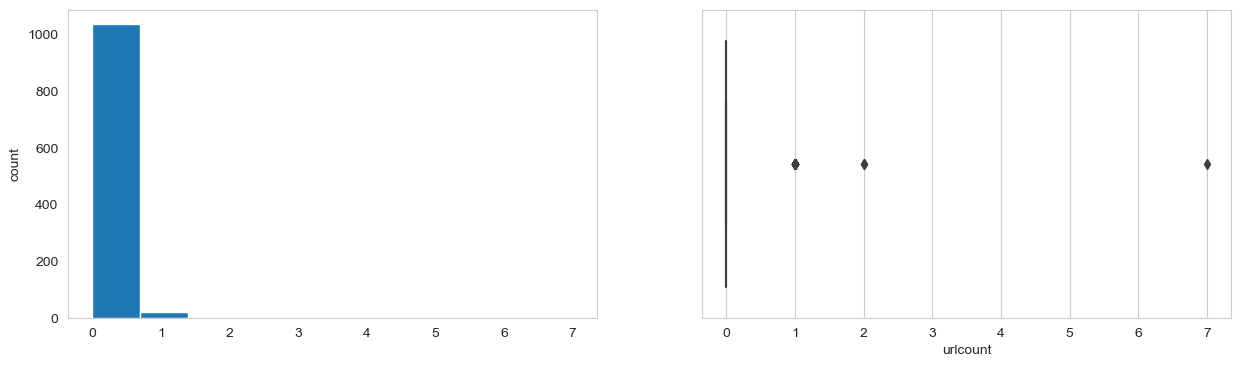

Letter_Count
Skew : 7.33


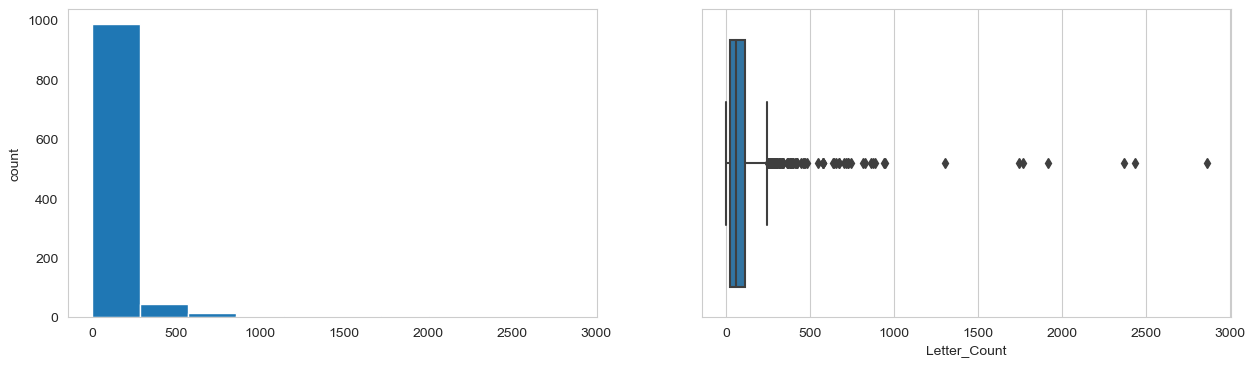

Word_Count
Skew : 7.4


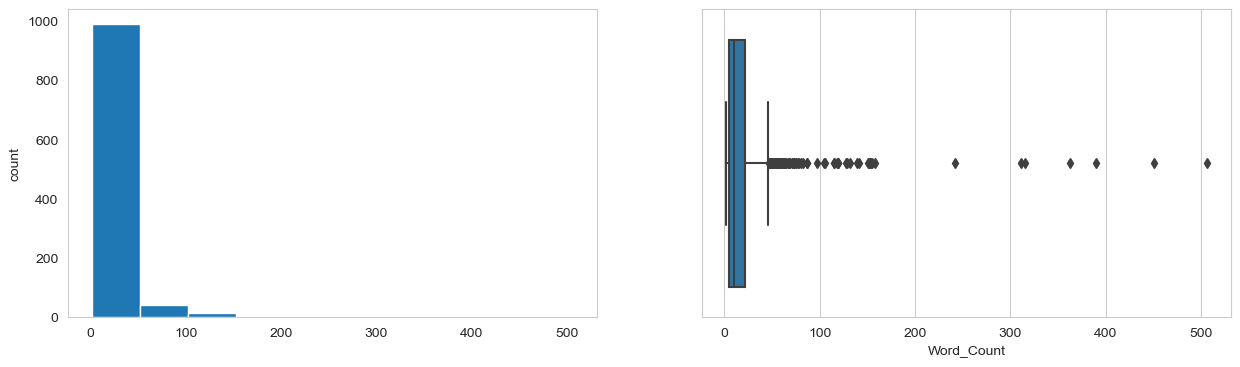

MessageCount
Skew : 0.0


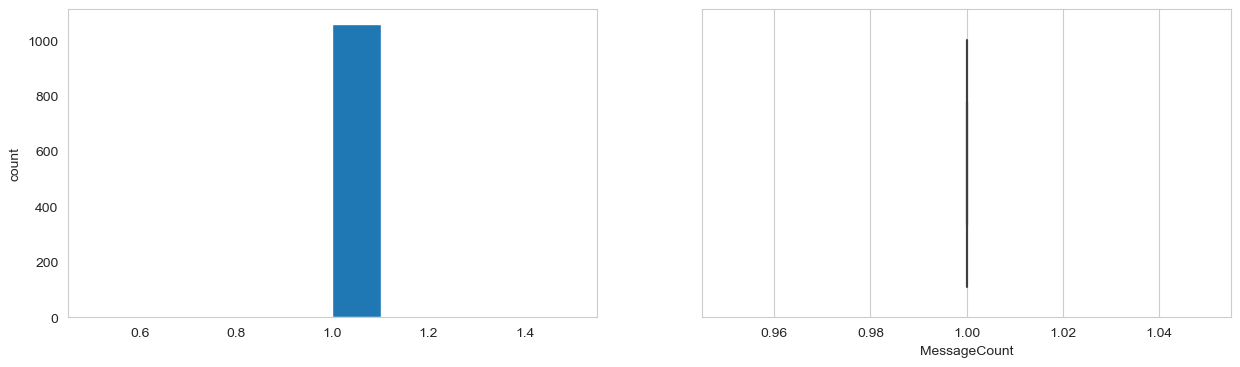

emojicount
Skew : 6.14


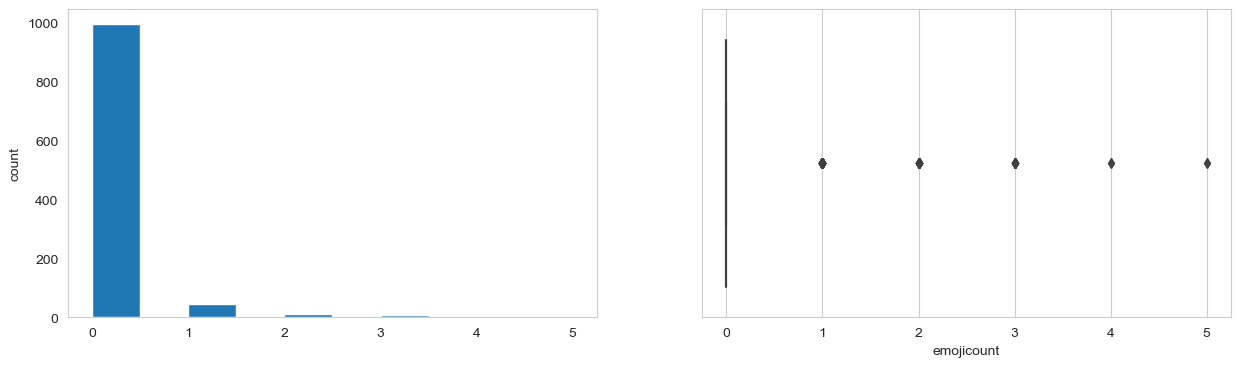

In [144]:

for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

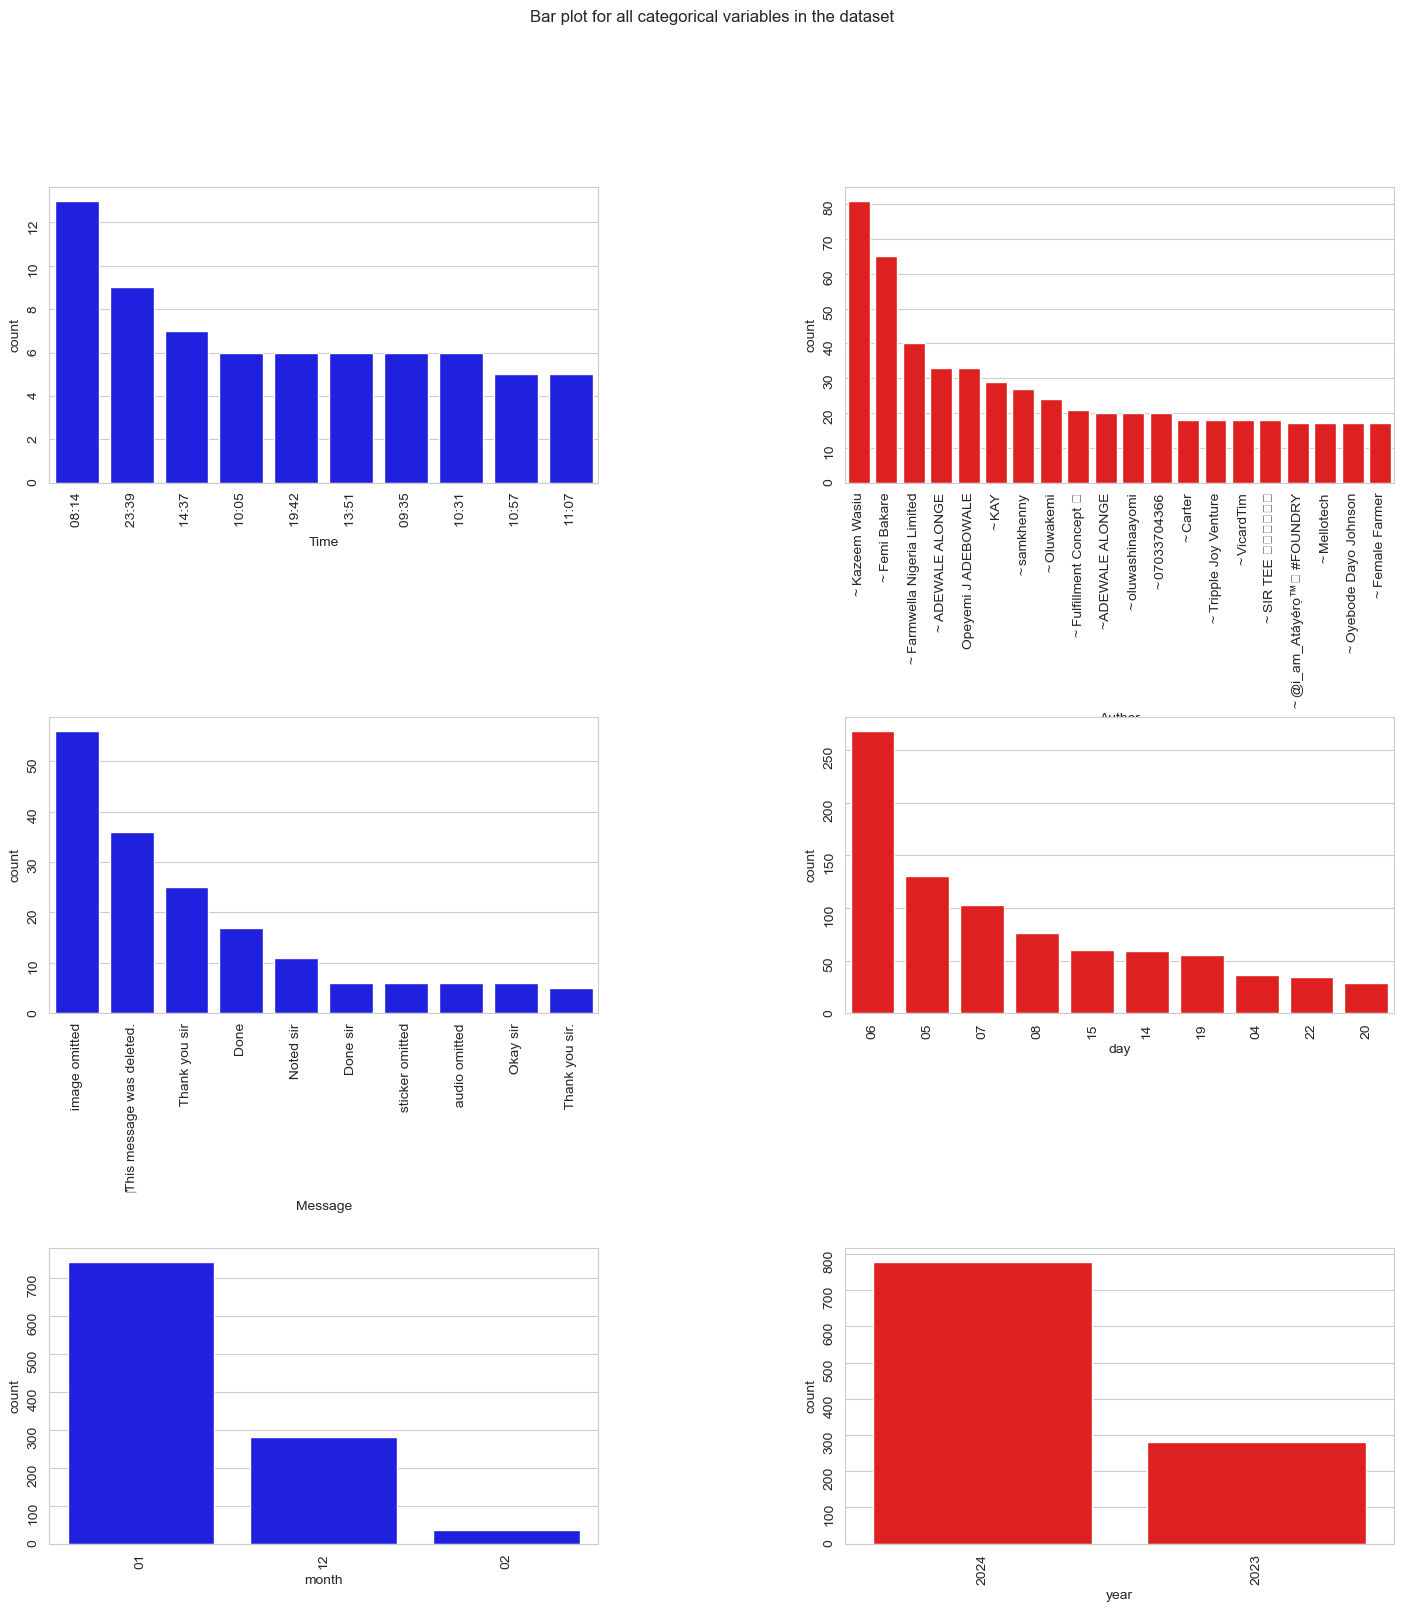

In [145]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
plt.tight_layout(pad = 15)
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Time', data = data, color = 'blue', 
              order = data['Time'].value_counts().head(10).index);
sns.countplot(ax = axes[0, 1], x = 'Author', data = data, color = 'red',
             order = data['Author'].value_counts().head(20).index);
sns.countplot(ax = axes[1, 0], x = 'Message', data = data, color = 'blue',
             order = data['Message'].value_counts().head(10).index);
sns.countplot(ax = axes[1, 1], x = 'day', data = data, color = 'red', 
              order = data['day'].value_counts().head(10).index);
sns.countplot(ax = axes[2, 0], x = 'month', data = data, color = 'blue',
             order = data['month'].value_counts().head(5).index);
sns.countplot(ax = axes[2, 1], x = 'year', data = data, color = 'red',
             order = data['year'].value_counts().index);


axes[1][1].tick_params(labelrotation=90);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);
axes[0, 0].tick_params(labelrotation=90);
axes[0, 1].tick_params(labelrotation=90);
axes[1, 0].tick_params(labelrotation=90);

Text(0.5, 1.0, 'Top 5 world count')

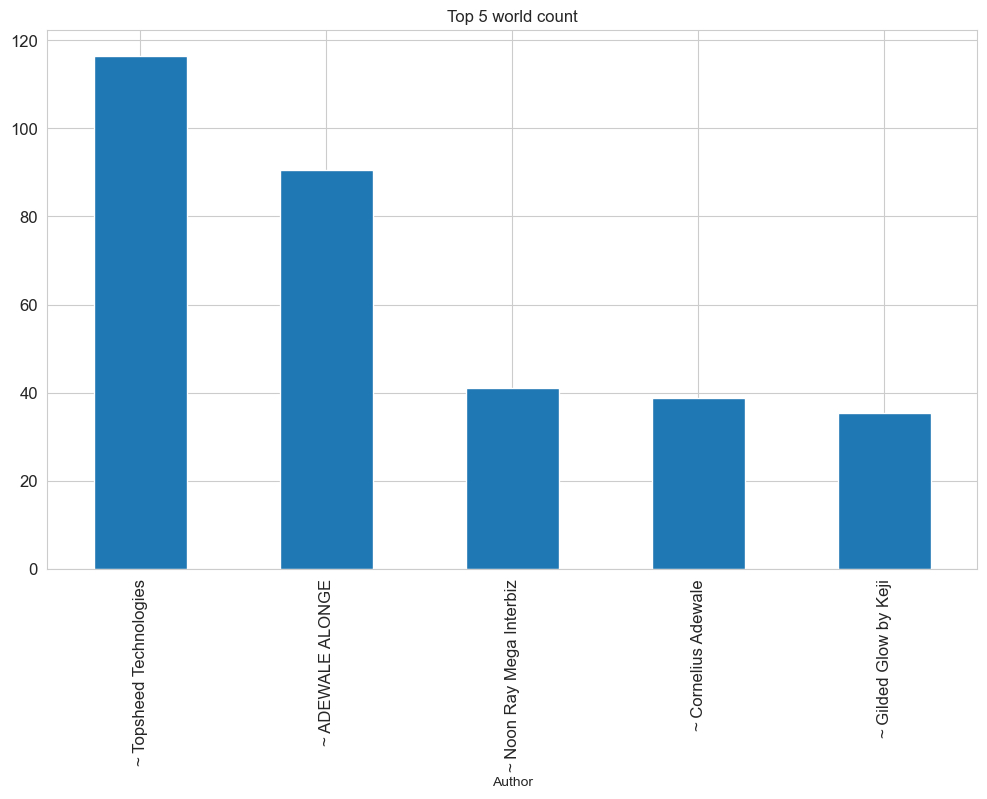

In [149]:
plt.figure(figsize=(12, 7))
data.groupby('Author')['Word_Count'].mean().sort_values(ascending=False).head(5).plot.bar( fontsize=12)
plt.title('Top 5 world count')


In [ ]:
plt.figure(figsize=(12, 7))

data.groupby('Author')['urlcount'].mean().sort_values(ascending=False).head(5).plot.bar( fontsize=12)
plt.title('Top 5 link/url sender in the group')

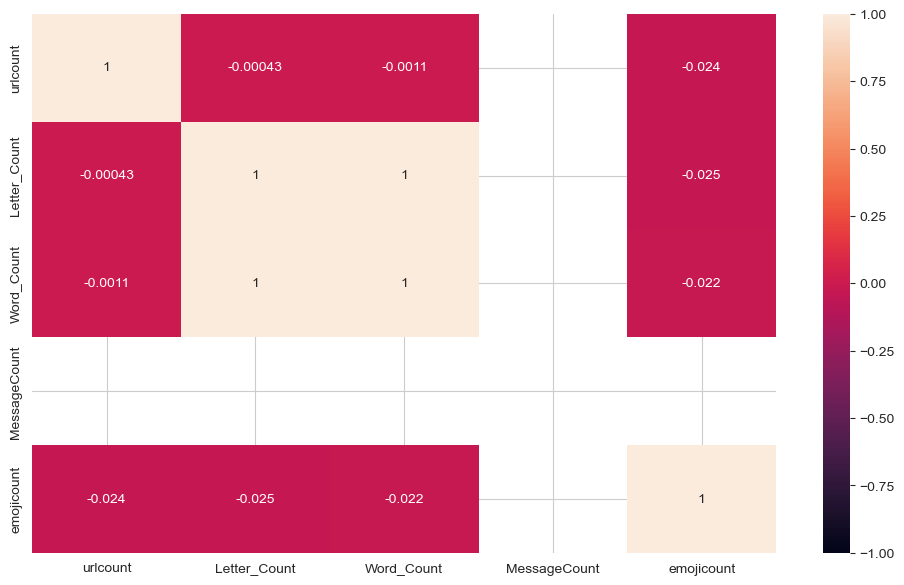

In [147]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Time', 'Author', 'Message', 'emoji', 'day', 'month', 'year'], axis = 1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()